In [ ]:
# 광원, 측정 스펙트럼으로부터 뇌 내 성분 농도 산출
"""
▶train.csv
id : 구분자
rho : 측정 거리 (단위: mm)
src : 광원 스펙트럼 (650 nm ~ 990 nm)
dst : 측정 스펙트럼 (650 nm ~ 990 nm)
hhb : 디옥시헤모글로빈 농도
hbo2 : 옥시헤모글로빈 농도
ca : 칼슘 농도
na : 나트륨 농도

▶test.csv
▶sample_submission.csv
"""

In [1]:
import pandas as pd                         
import matplotlib.pyplot as plt            
import seaborn as sns                     
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

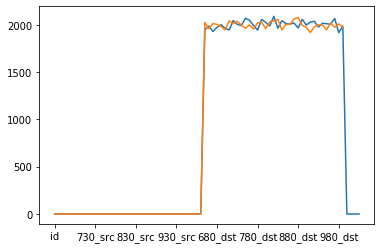

In [2]:
train = pd.read_csv('D:/study/train.csv')
test = pd.read_csv('D:/study/test.csv')
submission = pd.read_csv('D:/study/sample_submission.csv')

train.isna().sum().plot()
test.isna().sum().plot()

In [3]:
print(train.loc[14,'650_dst':'680_dst'])
test = test.fillna(-1)
train = train.fillna(-1)
print(train.loc[14,'650_dst':'680_dst'])

650_dst   NaN
660_dst   NaN
670_dst   NaN
680_dst   NaN
Name: 14, dtype: float64
650_dst   -1.0
660_dst   -1.0
670_dst   -1.0
680_dst   -1.0
Name: 14, dtype: float64


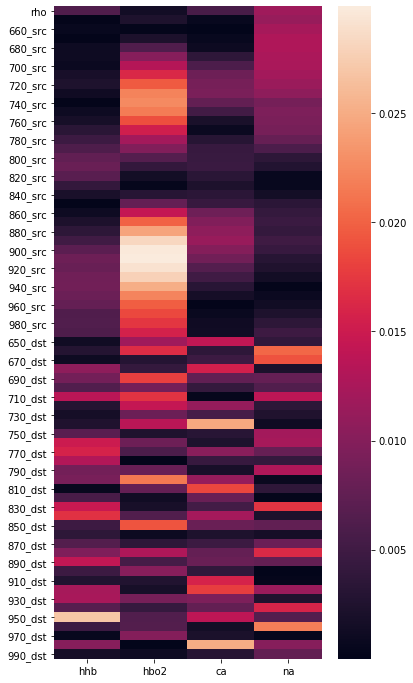

In [4]:
plt.figure(figsize=(6, 12))
sns.heatmap(train.corr().loc['rho':'990_dst', 'hhb':].abs())

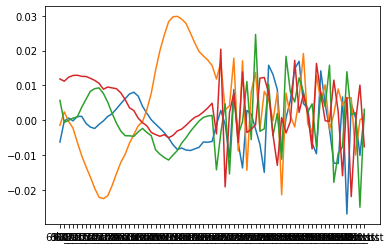

In [5]:
plt.plot(train.corr().loc['rho':'990_dst', 'hhb':])

In [6]:
x_test = test.loc[:, 'rho':'990_dst']
x_train = train.loc[:, 'rho':'990_dst']
y_train = train.loc[:, 'hhb':'na']
x_train.shape, y_train.shape

((10000, 71), (10000, 4))

In [7]:
## Linear Regression
hhb_model = LinearRegression().fit(x_train, y_train['hhb'])
hbo2_model = LinearRegression().fit(x_train, y_train['hbo2'])
ca_model = LinearRegression().fit(x_train, y_train['ca'])
na_model = LinearRegression().fit(x_train, y_train['na'])

hhb_pred = hhb_model.predict(x_train)
hbo2_pred = hbo2_model.predict(x_train)
ca_pred = ca_model.predict(x_train)
na_pred = na_model.predict(x_train)

preds = pd.DataFrame([hhb_pred,hbo2_pred,ca_pred,na_pred])
lr_preds = preds.T
lr_preds

,0,1,2,3
0,7.892734,3.911603,9.044214,3.210604
1,7.494566,4.048864,8.918449,3.017379
2,7.578206,3.934829,8.669257,3.223551
3,8.160991,4.050059,8.756529,2.848027
4,8.033371,3.997056,9.166511,3.166033
...,...,...,...,...
9995,7.809838,3.893093,9.354093,3.049238
9996,8.066016,4.104926,9.147565,2.850162
9997,8.094797,4.095685,9.225344,3.031411
9998,7.882737,3.879203,9.044470,2.932619


In [8]:
## Random Forest
hhb_model = RandomForestRegressor().fit(x_train, y_train['hhb'])
hbo2_model = RandomForestRegressor().fit(x_train, y_train['hbo2'])
ca_model = RandomForestRegressor().fit(x_train, y_train['ca'])
na_model = RandomForestRegressor().fit(x_train, y_train['na'])

hhb_pred = hhb_model.predict(x_train)
hbo2_pred = hbo2_model.predict(x_train)
ca_pred = ca_model.predict(x_train)
na_pred = na_model.predict(x_train)

preds = pd.DataFrame([hhb_pred,hbo2_pred,ca_pred,na_pred])
rf_preds = preds.T
rf_preds

,0,1,2,3
0,6.4845,4.1915,8.8025,3.7960
1,3.6522,3.1602,8.1392,3.8752
2,9.6376,3.2206,8.8872,4.2867
3,6.7016,3.8777,5.9949,4.0710
4,10.7887,4.2994,10.0351,2.8735
...,...,...,...,...
9995,10.9081,4.0843,11.0355,1.2744
9996,8.3669,4.2579,9.8197,3.0315
9997,8.5705,3.4443,9.1698,2.5425
9998,7.0939,3.9696,10.6570,3.6226


In [9]:
## XGBoost
hhb_model = XGBRegressor().fit(x_train, y_train['hhb'])
hbo2_model = XGBRegressor().fit(x_train, y_train['hbo2'])
ca_model = XGBRegressor().fit(x_train, y_train['ca'])
na_model = XGBRegressor().fit(x_train, y_train['na'])

hhb_pred = hhb_model.predict(x_train)
hbo2_pred = hbo2_model.predict(x_train)
ca_pred = ca_model.predict(x_train)
na_pred = na_model.predict(x_train)

preds = pd.DataFrame([hhb_pred,hbo2_pred,ca_pred,na_pred])
xgb_preds = preds.T
xgb_preds

,0,1,2,3
0,5.643738,3.921051,6.842874,2.769717
1,-0.166169,2.972631,7.127297,4.221428
2,10.774150,2.789032,9.373419,4.055972
3,5.380618,3.854215,6.160565,4.423488
4,11.862869,4.488175,10.658735,2.493663
...,...,...,...,...
9995,12.299421,4.065647,12.162666,1.959529
9996,8.369404,4.174299,9.513776,3.104619
9997,9.944136,3.398463,9.490285,3.010132
9998,6.764724,4.170152,11.589067,3.496347


In [10]:
## mean_absolute_error
print('lr :',mean_absolute_error(y_train,lr_preds))
print('rf :',mean_absolute_error(y_train,rf_preds))
print('xgb :',mean_absolute_error(y_train,xgb_preds))

lr : 1.7662846677198187
rf : 0.6681076550000006
xgb : 0.49244445640841095


In [ ]:
## Best Hyper Parameter
xx_train, xx_test, yy_train, yy_test = train_test_split(x_train, y_train, test_size=0.3)

# hhb
xgb = XGBRegressor()
params = {'learning_rate':[0.03,0.05,0.07],'max_depth':[6,7,8],'n_estimators':[500,600,700]}
gs = GridSearchCV(xgb,params,cv=5)
eval_set = [(xx_test, yy_test['hhb'])]
model = gs.fit(xx_train,yy_train['hhb'],eval_set=eval_set,eval_metric='mae',verbose=False)
print('hhb :',model.best_params_)

# hbo2
xgb = XGBRegressor()
params = {'learning_rate':[0.03,0.05,0.07],'max_depth':[6,7,8],'n_estimators':[500,600,700]}
gs = GridSearchCV(xgb,params,cv=5)
eval_set = [(xx_test, yy_test['hbo2'])]
model = gs.fit(xx_train,yy_train['hbo2'],eval_set=eval_set,eval_metric='mae',verbose=False)
print('hbo2 :',model.best_params_)

# ca
xgb = XGBRegressor()
params = {'learning_rate':[0.03,0.05,0.07],'max_depth':[6,7,8],'n_estimators':[500,600,700]}
gs = GridSearchCV(xgb,params,cv=5)
eval_set = [(xx_test, yy_test['ca'])]
model = gs.fit(xx_train,yy_train['ca'],eval_set=eval_set,eval_metric='mae',verbose=False)
print('ca :',model.best_params_)

# na
xgb = XGBRegressor()
params = {'learning_rate':[0.03,0.05,0.07],'max_depth':[6,7,8],'n_estimators':[500,600,700]}
gs = GridSearchCV(xgb,params,cv=5)
eval_set = [(xx_test, yy_test['na'])]
model = gs.fit(xx_train,yy_train['na'],eval_set=eval_set,eval_metric='mae',verbose=False)
print('na :',model.best_params_)

In [11]:
## train_test_split
xx_train, xx_test, yy_train, yy_test = train_test_split(x_train, y_train, test_size=0.3)

hhb_model2 = XGBRegressor(learning_rate=0.04,max_depth=7,n_estimators=1500).fit(xx_train, yy_train['hhb'])
hbo2_model2 = XGBRegressor(learning_rate=0.03,max_depth=7,n_estimators=1500).fit(xx_train, yy_train['hbo2'])
ca_model2 = XGBRegressor(learning_rate=0.02,max_depth=7, n_estimators=1500).fit(xx_train, yy_train['ca'])
na_model2 = XGBRegressor(learning_rate=0.02,max_depth=7, n_estimators=1500).fit(xx_train, yy_train['na'])

hhb_pred2 = hhb_model2.predict(xx_test)
hbo2_pred2 = hbo2_model2.predict(xx_test)
ca_pred2 = ca_model2.predict(xx_test)
na_pred2 = na_model2.predict(xx_test)

preds2 = pd.DataFrame([hhb_pred2,hbo2_pred2,ca_pred2,na_pred2])
xgb_preds2 = preds2.T

print(mean_absolute_error(yy_test,xgb_preds2))
print('hhb :',mean_absolute_error(yy_test['hhb'],hhb_pred2))
print('hbo2 :',mean_absolute_error(yy_test['hbo2'],hbo2_pred2))
print('ca :',mean_absolute_error(yy_test['ca'],ca_pred2))
print('na :',mean_absolute_error(yy_test['na'],na_pred2))

1.2565142390720054
hhb : 1.007393550847769
hbo2 : 0.6680684680970509
ca : 1.98756780986468
na : 1.36302712747852


In [12]:
## predict
hhb_model = XGBRegressor(learning_rate=0.04,max_depth=7,n_estimators=1500).fit(x_train, y_train['hhb'])
hbo2_model = XGBRegressor(learning_rate=0.03,max_depth=7,n_estimators=1500).fit(x_train, y_train['hbo2'])
ca_model = XGBRegressor(learning_rate=0.02,max_depth=7,n_estimators=1500).fit(x_train, y_train['ca'])
na_model = XGBRegressor(learning_rate=0.02,max_depth=7,n_estimators=1500).fit(x_train, y_train['na'])

submission['hhb'] = hhb_model.predict(x_test)
submission['hbo2'] = hbo2_model.predict(x_test)
submission['ca'] = ca_model.predict(x_test)
submission['na'] = na_model.predict(x_test)
submission

,id,hhb,hbo2,ca,na
0,10000,8.774163,4.505719,9.832373,3.976389
1,10001,6.232327,3.765445,8.205814,2.235455
2,10002,9.916825,4.662424,11.238475,3.885145
3,10003,8.709008,4.276793,10.213069,3.525997
4,10004,6.410109,3.473043,8.042811,4.006946
...,...,...,...,...,...
9995,19995,5.288721,3.902143,12.228891,3.465399
9996,19996,10.139989,3.865602,7.064487,2.809771
9997,19997,8.169130,3.464688,8.885634,3.330626
9998,19998,12.617371,3.974408,8.990358,3.054527


In [ ]:
submission.to_csv('D:/study/Dacon_bio.csv', index=False)